# Research Question (Eric Young)

Do developed countries overall have a different set of statistically significant parameters than developing countries?

In [1]:
import pandas as pd
data_2015=pd.read_csv('2015.csv')  
data_2016=pd.read_csv('2016.csv')  
data_2017=pd.read_csv('2017.csv')  
data_2018=pd.read_csv('2018.csv')  
data_2019=pd.read_csv('2019.csv')  

In [2]:
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
freedom_data = pd.read_csv('hfi_cc_2020.csv')

In [4]:
freedom_data.head()

,Unnamed: 0,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,0,2018,ALB,Albania,Eastern Europe,7.81,43.0,2.0,6.0,4.8,...,6.7,9.7,5.4,5.6,7.2,6.7,7.7,7.80,26.0,9.26
1,1,2017,ALB,Albania,Eastern Europe,7.78,44.0,2.0,6.3,4.4,...,6.7,9.7,6.0,6.0,7.2,7.0,7.9,7.70,36.0,9.26
2,2,2016,ALB,Albania,Eastern Europe,7.63,50.0,2.0,6.7,4.5,...,6.0,9.7,6.0,7.3,7.1,7.0,7.6,7.69,36.0,7.50
3,3,2015,ALB,Albania,Eastern Europe,7.55,52.0,2.0,6.7,4.5,...,6.0,9.7,6.0,7.3,7.1,7.0,7.7,7.70,34.0,7.50
4,4,2014,ALB,Albania,Eastern Europe,7.65,48.0,2.0,6.1,4.8,...,6.0,9.7,6.0,7.2,6.0,6.8,7.8,7.65,37.0,7.50


### Developed v.s. Developing Countries

Most commonly, the criteria for evaluating the degree of economic development are gross domestic product (GDP), gross national product (GNP), the per capita income, level of industrialization, amount of widespread infrastructure and general standard of living.

# Methods (2019 Happiness Data)

### I. Theory

We employed the k-means clustering algorithm to efficiently group the countries into multiple clusters with distinct characteristics. The general idea of the k-means clustering algorithm is to partition points into k-clusters c1, c2, …, ck and find the corresponding k center points z1, z2, …, zk in order to minimize the cost function. 

More precisely, the k-means clustering algorithm (Figure 6) follows the following 3 iterative steps:
1. Initialization:
- To start the algorithm, randomly select k data points from the dataset as initial centroids. Note that centroids are the centers of clusters. In this case, since we have no information indicating the location of cluster centers, we arbitrarily define them. 
2. Cluster Assignment:
- Calculate the Euclidean distances of each data point from each centroid, assigning all the data points that are closest to a centroid to a cluster. 
3. Centroid Movement:
- Calculate the new centroid of each cluster, which is the mean of all data points in the cluster. Repeat steps 2 and 3 until the algorithm converges to acquire the final clustering assignments. 

Lastly, we used the elbow method, which runs the k-means clustering algorithm with different numbers of clusters and finds the within-cluster sum of squares (measures within-cluster variance), to determine the ideal number of clusters to choose. 

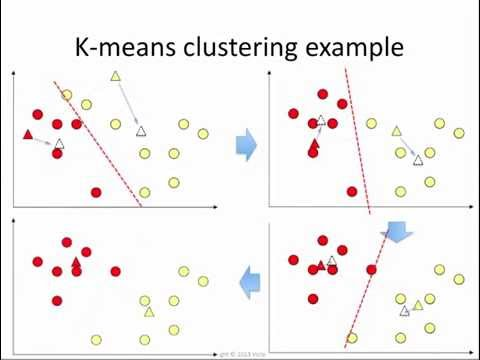

### II. Code

#### Data Preprocessing 
Upon data mining, we normalized the data (rescaled numeric values into the range 0 and 1) to ensure that every attribute contributed equally to determining the distance between points. We chose normalization over standardization because our input attributes rely on the magnitude of values instead of the distribution of Gaussian processes. 

In [5]:
# copy dataframe columns to attribute variables
country = data_2019.iloc[:,1].copy()
score = data_2019.iloc[:,2].copy()
gdp = data_2019.iloc[:,3].copy()
social = data_2019.iloc[:,4].copy()
life_exp = data_2019.iloc[:,5].copy()
freedom = data_2019.iloc[:,6].copy()
genorosity = data_2019.iloc[:,7].copy()
corruption = data_2019.iloc[:,8].copy()

In [6]:
from sklearn import preprocessing
# 7 dimensional attribute list 
attributes = []
for i in range(len(country)):
    attributes.append([score[i], gdp[i], social[i], life_exp[i], freedom[i], genorosity[i], corruption[i]])
# normalization
normalized_attributes = preprocessing.normalize(attributes)

#### Selecting the Ideal Number of Clusters (Elbow Plot)
To select the ideal number of clusters for the k-means clustering algorithm to find, we use the elbow method and notice that “elbow of the curve” is around 3 clusters. To minimize the within-cluster sum of squares error while drawing useful conclusions, we choose 3 clusters for our algorithm. 

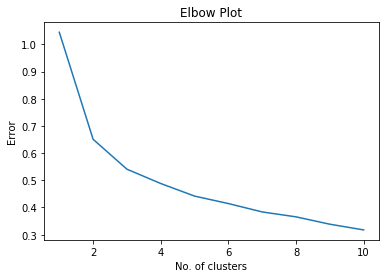

In [22]:
# elbow plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(normalized_attributes)
    kmeans.fit(normalized_attributes)
    Error.append(kmeans.inertia_)
plt.plot(range(1,11), Error)
plt.title("Elbow Plot")
plt.xlabel("No. of clusters")
plt.ylabel("Error")
plt.show()

#### Implementing the K-Means Clustering Algorithm
We proceed to implement the k-means clustering algorithm with 3 clusters and a convergence criterion of 0.001. Note that the convergence criterion, which determines when iteration ceases, represents a proportion of the minimum distance between initial cluster centers.

In [8]:
import numpy as np 
kmeans3 = KMeans(n_clusters = 3, tol=0.001)
clusters = kmeans3.fit_predict(normalized_attributes)
print("Cluster Assignments: " + str(clusters))

Cluster Assignments: [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 2 0 0 0 2 0 0 0 0 0 2 0 0 2 0 2 0 2 0 0 0 1 0 2 0 2 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 2 0 2 2 1 0 1 1 2 0 1 1 0 2 0 0 0 2 2 2
 1 0 1 1 0 0 1 0 1 2 2 1 0 2 0 1 2 1 0 2 1 0 2 2 2 0 2 1 0 1 1 2 2 1 2 1 0
 1 1 2 2 2 1 1 1]


### Results

#### Country Groupings

In [10]:
group_0_countries = []
group_1_countries = []
group_2_countries = []
for i in range(len(clusters)):
    if clusters[i] == 0: 
        group_0_countries.append(country[i])
    elif clusters[i] == 1:
        group_1_countries.append(country[i])
    elif clusters[i] == 2:
        group_2_countries.append(country[i])
print("Group 0 Countries: " + str(group_0_countries))
print("Group 1 Countries: " + str(group_1_countries))
print("Group 2 Countries: " + str(group_2_countries))

Group 0 Countries: ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia', 'Israel', 'Luxembourg', 'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States', 'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico', 'France', 'Taiwan', 'Chile', 'Saudi Arabia', 'Qatar', 'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland', 'Lithuania', 'Colombia', 'Slovenia', 'Argentina', 'Romania', 'Cyprus', 'Kuwait', 'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Mauritius', 'Japan', 'Kazakhstan', 'Hungary', 'Northern Cyprus', 'Peru', 'Portugal', 'Russia', 'Serbia', 'Libya', 'Montenegro', 'Croatia', 'Hong Kong', 'Dominican Republic', 'Bosnia and Herzegovina', 'Turkey', 'Malaysia', 'Belarus', 'Greece', 'Mongolia', 'North Macedonia', 'Turkmenistan', 'Algeria', 'Morocco', 'Azerbaijan', 'Lebanon', 'China', 'Bulgaria', 'Jordan', 'Gabon', 'South Africa', 'A

#### Summary Statistics for Each Group

In [11]:
group_0_stats = []
group_1_stats = []
group_2_stats = []
for i in range(len(clusters)):
    if clusters[i] == 0: 
        group_0_stats.append([score[i], gdp[i], social[i], life_exp[i], freedom[i], genorosity[i], corruption[i]])
    elif clusters[i] == 1:
        group_1_stats.append([score[i], gdp[i], social[i], life_exp[i], freedom[i], genorosity[i], corruption[i]])
    elif clusters[i] == 2:
        group_2_stats.append([score[i], gdp[i], social[i], life_exp[i], freedom[i], genorosity[i], corruption[i]])

#### Group 0

In [19]:
# group 0 summary statistics
group_0_score = [i[0] for i in group_0_stats]
group_0_gdp = [i[1] for i in group_0_stats]
group_0_social = [i[2] for i in group_0_stats]
group_0_life_exp = [i[3] for i in group_0_stats]
group_0_freedom = [i[4] for i in group_0_stats]
group_0_generosity = [i[5] for i in group_0_stats]
group_0_corruption = [i[6] for i in group_0_stats]

print("Score Mean: " + str(np.mean(group_0_score)))
print("Score SD: " + str(np.std(group_0_score)))
print("\n")
print("GDP Mean: " + str(np.mean(group_0_gdp)))
print("GDP SD: " + str(np.std(group_0_gdp)))
print("\n")
print("Social Support Mean: " + str(np.mean(group_0_social)))
print("Social Support SD: " + str(np.std(group_0_social)))
print("\n")
print("Life Expectancy Mean: " + str(np.mean(group_0_life_exp)))
print("Life Expectancy SD: " + str(np.std(group_0_life_exp)))
print("\n")
print("Generosity Mean: " + str(np.mean(group_0_generosity)))
print("Generosity SD: " + str(np.std(group_0_generosity)))
print("\n")
print("Corruption Mean: " + str(np.mean(group_0_corruption)))
print("Corruption SD: " + str(np.std(group_0_corruption)))

Score Mean: 5.901663043478262
Score SD: 0.9505040456558449


GDP Mean: 1.179945652173913
GDP SD: 0.2003505820854184


Social Support Mean: 1.3495760869565216
Social Support SD: 0.1969450504745606


Life Expectancy Mean: 0.8675760869565217
Life Expectancy SD: 0.14198095659933416


Generosity Mean: 0.16431521739130434
Generosity SD: 0.09228805676036805


Corruption Mean: 0.12126086956521738
Corruption SD: 0.10903488368459618


#### Group 1

In [20]:
# group 0 summary statistics
group_1_score = [i[0] for i in group_1_stats]
group_1_gdp = [i[1] for i in group_1_stats]
group_1_social = [i[2] for i in group_1_stats]
group_1_life_exp = [i[3] for i in group_1_stats]
group_1_freedom = [i[4] for i in group_1_stats]
group_1_generosity = [i[5] for i in group_1_stats]
group_1_corruption = [i[6] for i in group_1_stats]

print("Score Mean: " + str(np.mean(group_1_score)))
print("Score SD: " + str(np.std(group_1_score)))
print("\n")
print("GDP Mean: " + str(np.mean(group_1_gdp)))
print("GDP SD: " + str(np.std(group_1_gdp)))
print("\n")
print("Social Support Mean: " + str(np.mean(group_1_social)))
print("Social Support SD: " + str(np.std(group_1_social)))
print("\n")
print("Life Expectancy Mean: " + str(np.mean(group_1_life_exp)))
print("Life Expectancy SD: " + str(np.std(group_1_life_exp)))
print("\n")
print("Generosity Mean: " + str(np.mean(group_1_generosity)))
print("Generosity SD: " + str(np.std(group_1_generosity)))
print("\n")
print("Corruption Mean: " + str(np.mean(group_1_corruption)))
print("Corruption SD: " + str(np.std(group_1_corruption)))

Score Mean: 4.3341111111111115
Score SD: 0.7181389700099233


GDP Mean: 0.3413703703703703
GDP SD: 0.20699063284373043


Social Support Mean: 0.7535925925925926
Social Support SD: 0.2535258419524978


Life Expectancy Mean: 0.3827037037037037
Life Expectancy SD: 0.12230617767469348


Generosity Mean: 0.21844444444444447
Generosity SD: 0.058610663505399854


Corruption Mean: 0.09422222222222223
Corruption SD: 0.05337243936668642


#### Group 2

In [21]:
# group 0 summary statistics
group_2_score = [i[0] for i in group_2_stats]
group_2_gdp = [i[1] for i in group_2_stats]
group_2_social = [i[2] for i in group_2_stats]
group_2_life_exp = [i[3] for i in group_2_stats]
group_2_freedom = [i[4] for i in group_2_stats]
group_2_generosity = [i[5] for i in group_2_stats]
group_2_corruption = [i[6] for i in group_2_stats]

print("Score Mean: " + str(np.mean(group_2_score)))
print("Score SD: " + str(np.std(group_2_score)))
print("\n")
print("GDP Mean: " + str(np.mean(group_2_gdp)))
print("GDP SD: " + str(np.std(group_2_gdp)))
print("\n")
print("Social Support Mean: " + str(np.mean(group_2_social)))
print("Social Support SD: " + str(np.std(group_2_social)))
print("\n")
print("Life Expectancy Mean: " + str(np.mean(group_2_life_exp)))
print("Life Expectancy SD: " + str(np.std(group_2_life_exp)))
print("\n")
print("Generosity Mean: " + str(np.mean(group_2_generosity)))
print("Generosity SD: " + str(np.std(group_2_generosity)))
print("\n")
print("Corruption Mean: " + str(np.mean(group_2_corruption)))
print("Corruption SD: " + str(np.std(group_2_corruption)))

Score Mean: 4.960351351351351
Score SD: 0.9591030217249644


GDP Mean: 0.6332702702702702
GDP SD: 0.2004677838441539


Social Support Mean: 1.1909999999999998
Social Support SD: 0.17562921630987718


Life Expectancy Mean: 0.6212972972972973
Life Expectancy SD: 0.19428842656061143


Generosity Mean: 0.21137837837837833
Generosity SD: 0.10839750454676038


Corruption Mean: 0.09605405405405405
Corruption SD: 0.07149104874830284


#### Horizontal Comparsion Among Clustering Groups

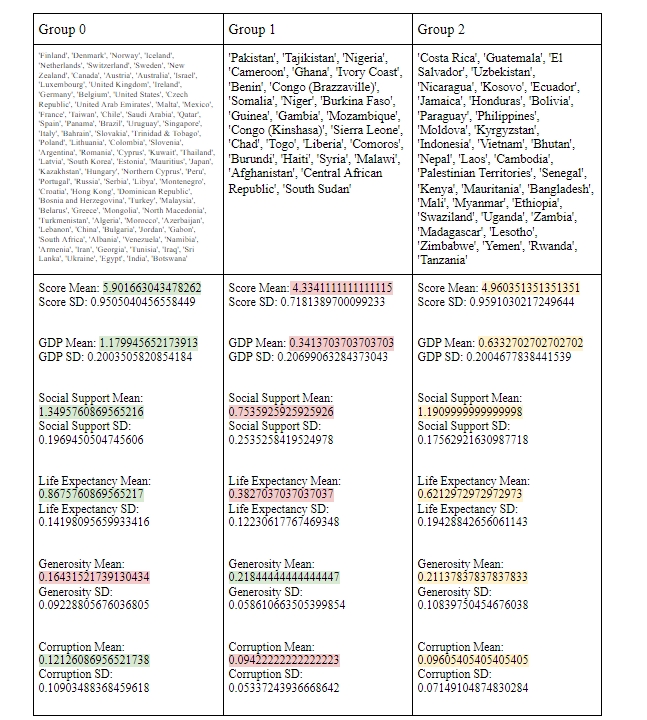